In [1]:
import time
import datetime as dt

def epoch_to_millis(epoch):
    
    datetime_time = dt.datetime.fromtimestamp(epoch)
    s = (datetime_time - dt.datetime(1970, 1, 1)).total_seconds()-3600
               
    return s
    

In [2]:
#import e parsing file di log
import pandas as pd



def start(path):
    
    file = open(path, 'r')
    Lines = file.readlines()
    
    return Lines

def rmse_distance(Lines):
    
    coppie = []

    for line in Lines:
        
        if 'COUPLE(N_ITER,DISTANCE RMSE)' in line:
            split = line.split(':')
            s = split[3].replace('[','')
            s = s.replace('(','')
            s = s.replace(')','')
            s = s.replace(']','')
            s = s.split(',')
            a = int(s[0])
            b = float(s[1])
            coppie.append((a,b))          
        
    return coppie


def execution_time_gurobi(Lines):
    
    for line in Lines:
        
        if 'TEMPO_ESECUZIONE GUROBI' in line:
            split = line.split(':')
            
    return epoch_to_millis(float(split[3]))
    
    
def execution_time_tensorflow(Lines):
    
    for line in Lines:
        if 'TEMPO_ESECUZIONE TENSORFLOW' in line:
            split = line.split(':')
            
    return epoch_to_millis(float(split[3]))


def time_per_iter(Lines):
    
    coppie = []

    for line in Lines:
        
        if 'TEMPO PER ITERAZIONI (N_ITER,TEMPO) TENSORFLOW' in line:
            split = line.split(':')
            s = split[3].replace('[','')
            s = s.replace('(','')
            s = s.replace(')','')
            s = s.replace(']','')
            s = s.split(',')
            a = int(s[0])
            b = epoch_to_millis(float(s[1]))
            coppie.append((a,b))          
        
    return coppie


In [3]:
#funzione per graficare

import matplotlib.pyplot as plt

def graph_rmse_distance(coppie):

    x_val = [x[0] for x in coppie]
    y_val = [x[1] for x in coppie]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(x_val,y_val)
    ax.plot(x_val,y_val,'or')
    
    ax.set_title('Rmse Distance per number of iterations')
    
    ax.set_ylabel('RMSE Distance (Gurobi -TensorFlow)')
    ax.set_xlabel('Number of Iterations')

    return plt.show()

def graph_time_per_iter(coppie):

    x_val = [x[0] for x in coppie]
    y_val = [x[1] for x in coppie]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(x_val,y_val)
    ax.plot(x_val,y_val,'or')
    
    
    ax.set_title('Time Tensorflow per Number of Iterations')
    ax.set_ylabel('Total Time Tensorflow)')
    ax.set_xlabel('Number of Iteration')

    return plt.show()

def graph_rmse_distance_and_execution_time(couples_rmse, couples_time):
    
    x1 = [x[0] for x in couples_rmse]
    x2 = [x[0] for x in couples_time]

    y1 = [x[1] for x in couples_rmse]
    y2 = [x[1] for x in couples_time]
    
    plt.subplot(2, 1, 1)
    plt.plot(x1, y1, 'ko-')
    plt.title('Rmse Distance per Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('RMSE Distance (Gurobi -TensorFlow)')


    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, 'r.-')
    plt.title('Time Tensorflow per Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Total Time Tensorflow)')
    return plt.show()


In [4]:
#funzione per tabella

def tab_rmse_distance(coppie):
    
    print ("N_ITER        RMSE_DISTANCE")
    for i in coppie:
        print ("{:<14}{:<11}".format(*i))

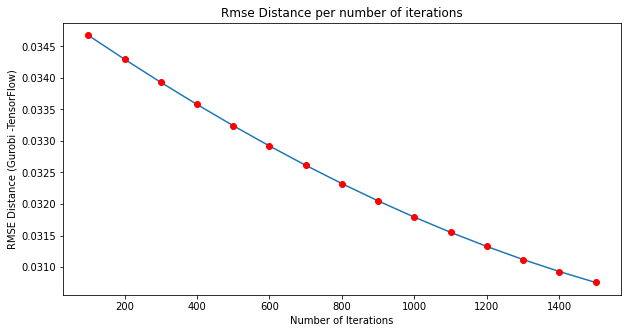

N_ITER        RMSE_DISTANCE
100           0.03467413435938064
200           0.034295192804455546
300           0.03392989701471416
400           0.03357868852796803
500           0.033242014268668775
600           0.03292031991543054
700           0.032614048752191906
800           0.03232363916334144
900           0.03204952076541504
1000          0.03179197285350038
1100          0.03155116484123143
1200          0.03132721735471375
1300          0.031120058583613833
1400          0.030929850073420022
1500          0.03075688570704163


In [5]:
path = "../../../log/Prove-4/Setosa/c1_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


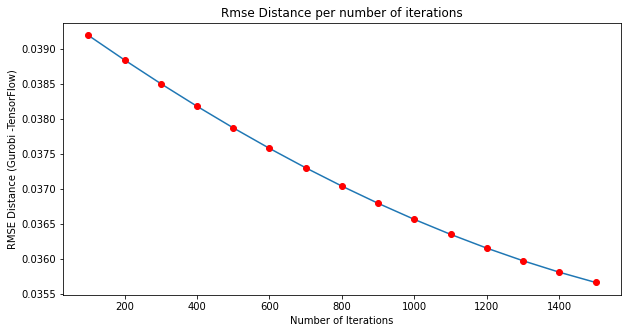

N_ITER        RMSE_DISTANCE
100           0.03919012154695731
200           0.038838851549649056
300           0.038501684240356174
400           0.03817899356423137
500           0.03787114942574956
600           0.03757851630232048
700           0.03730145003437136
800           0.03704017835460126
900           0.03679478554088015
1000          0.03656542619686716
1100          0.03635234371798088
1200          0.03615570318718667
1300          0.035975770439864205
1400          0.035812796784973525
1500          0.03566701509835054


In [6]:
path = "../../../log/Prove-4/Setosa/c1_sigma01_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

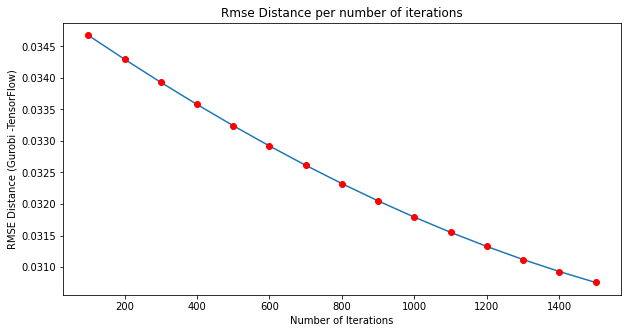

N_ITER        RMSE_DISTANCE
100           0.03467413435938064
200           0.034295192804455546
300           0.03392989701471416
400           0.03357868852796803
500           0.033242014268668775
600           0.03292031991543054
700           0.032614048752191906
800           0.03232363916334144
900           0.03204952076541504
1000          0.03179197285350038
1100          0.03155116484123143
1200          0.03132721735471375
1300          0.031120058583613833
1400          0.030929850073420022
1500          0.03075688570704163


In [7]:
path = "../../../log/Prove-4/Setosa/c1_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

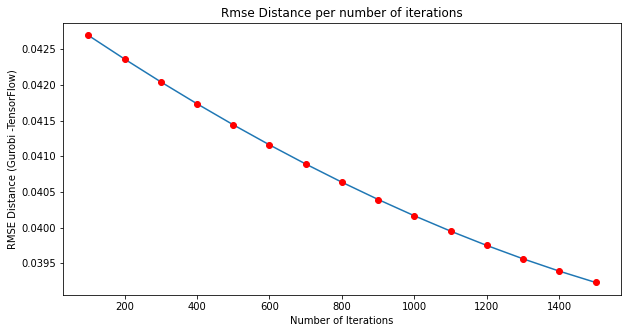

N_ITER        RMSE_DISTANCE
100           0.042694645041101584
200           0.04236257391229139
300           0.04204275556977076
400           0.04173545737280846
500           0.04144095774120196
600           0.04115940440499506
700           0.040890823978758935
800           0.04063535477048052
900           0.04039322761821299
1000          0.040164560213329155
1100          0.039949548118875924
1200          0.03974841296404941
1300          0.03956136359184834
1400          0.039388598449889206
1500          0.03923030431433314


In [8]:
path = "../../../log/Prove-4/Setosa/c1_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


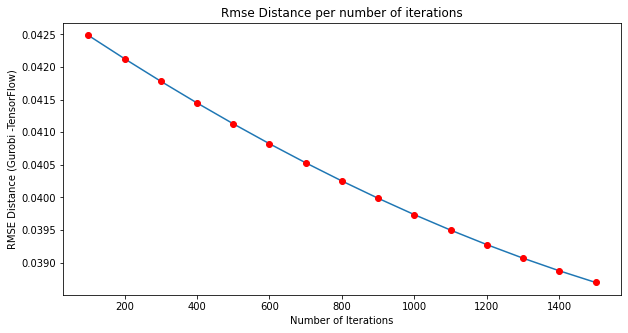

N_ITER        RMSE_DISTANCE
100           0.042485595649990486
200           0.0421272158269076
300           0.04178161604119966
400           0.04144897749975155
500           0.04112950051137254
600           0.040823354428145026
700           0.0405306884602495
800           0.040251692131865004
900           0.039986530189898256
1000          0.03973540169093081
1100          0.03949844012238199
1200          0.0392758768063723
1300          0.03906785684310639
1400          0.03887451815187934
1500          0.038696065577050257


In [9]:
path = "../../../log/Prove-4/Setosa/c1_sigma025_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

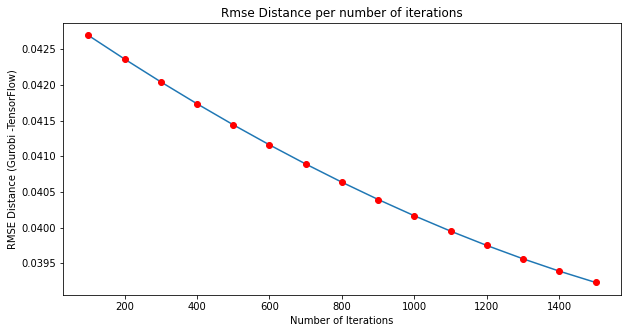

N_ITER        RMSE_DISTANCE
100           0.042694645041101584
200           0.04236257391229139
300           0.04204275556977076
400           0.04173545737280846
500           0.04144095774120196
600           0.04115940440499506
700           0.040890823978758935
800           0.04063535477048052
900           0.04039322761821299
1000          0.040164560213329155
1100          0.039949548118875924
1200          0.03974841296404941
1300          0.03956136359184834
1400          0.039388598449889206
1500          0.03923030431433314


In [10]:
path = "../../../log/Prove-4/Setosa/c1_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

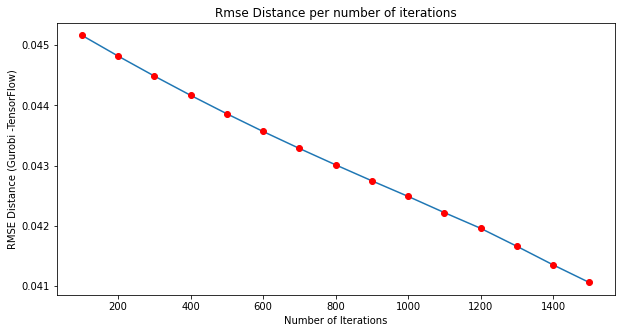

N_ITER        RMSE_DISTANCE
100           0.045164267951821394
200           0.04481968984899122
300           0.04448772208618549
400           0.04416842435443116
500           0.043861826969533946
600           0.04356796439723527
700           0.04328657868521794
800           0.04301448261624182
900           0.04274915279629603
1000          0.04249048439628539
1100          0.042221628070191246
1200          0.04196110002845891
1300          0.04166273045285282
1400          0.04135427389367928
1500          0.04106120907315571


In [11]:
path = "../../../log/Prove-4/Setosa/c1_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


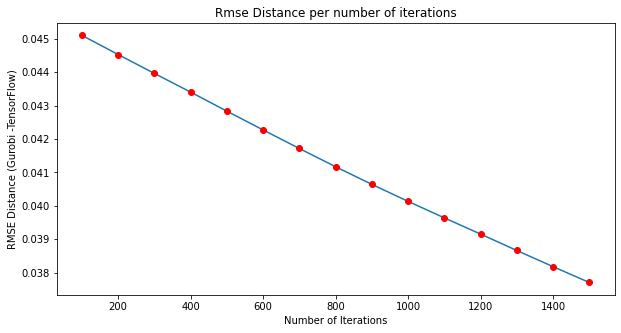

N_ITER        RMSE_DISTANCE
100           0.04510151464939072
200           0.04452667596868755
300           0.04396150037946084
400           0.04340212153232251
500           0.042831824704891414
600           0.04226930036399308
700           0.04171367857600228
800           0.04116768274104433
900           0.040640377876061354
1000          0.040131356296541416
1100          0.03963719371229538
1200          0.039151771218172954
1300          0.03866034136036735
1400          0.03817728753567502
1500          0.037702795683366534


In [12]:
path = "../../../log/Prove-4/Setosa/c1_sigma05_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

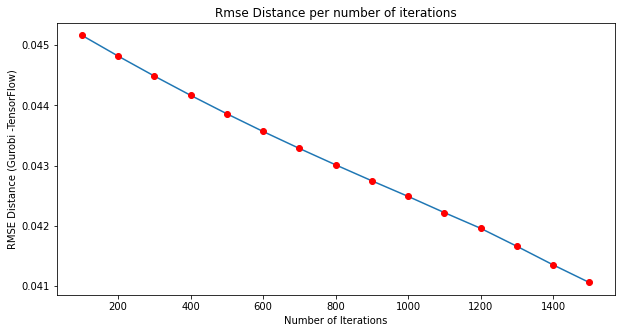

N_ITER        RMSE_DISTANCE
100           0.045164267951821394
200           0.04481968984899122
300           0.04448772208618549
400           0.04416842435443116
500           0.043861826969533946
600           0.04356796439723527
700           0.04328657868521794
800           0.04301448261624182
900           0.04274915279629603
1000          0.04249048439628539
1100          0.042221628070191246
1200          0.04196110002845891
1300          0.04166273045285282
1400          0.04135427389367928
1500          0.04106120907315571


In [13]:
path = "../../../log/Prove-4/Setosa/c1_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

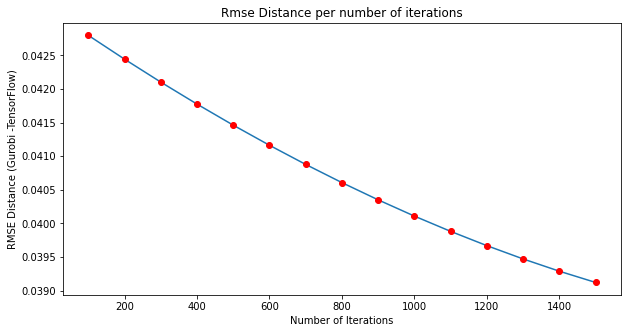

N_ITER        RMSE_DISTANCE
100           0.042800004450459096
200           0.042445224601311664
300           0.042103914663982715
400           0.04177629902019394
500           0.04146264015897459
600           0.04116311319597384
700           0.040877812860151505
800           0.04060678776295971
900           0.04035027508170877
1000          0.040108311059626894
1100          0.039880917659711995
1200          0.039668212980479546
1300          0.03947040318243174
1400          0.03928771383877673
1500          0.039120331411607284


In [14]:
path = "../../../log/Prove-4/Setosa/c75_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


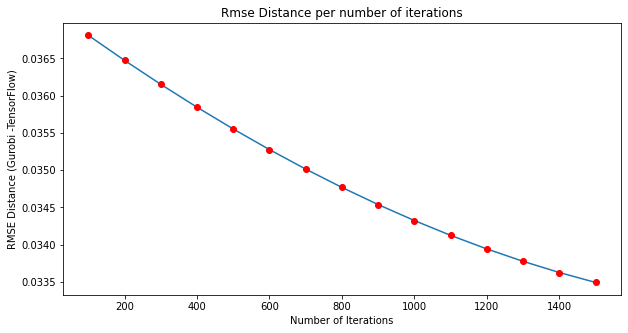

N_ITER        RMSE_DISTANCE
100           0.036809630711330005
200           0.03647385005704917
300           0.036152383965873974
400           0.035845498230430047
500           0.035553435108192165
600           0.035276521550646804
700           0.03501503051528493
800           0.03476903550655196
900           0.03453882356032323
1000          0.0343244222745854
1100          0.034125897801016714
1200          0.033943420484074574
1300          0.03377712386378511
1400          0.03362724478211142
1500          0.0334940022859777


In [15]:
path = "../../../log/Prove-4/Setosa/c75_sigma01_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

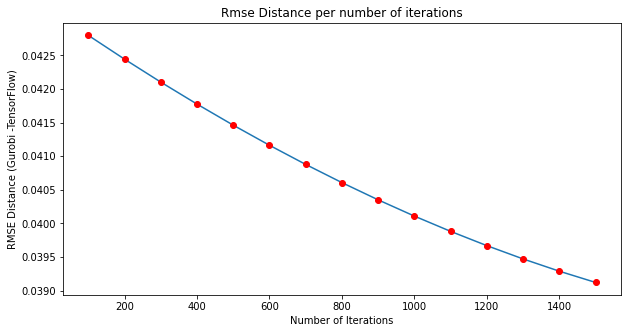

N_ITER        RMSE_DISTANCE
100           0.042800004450459096
200           0.042445224601311664
300           0.042103914663982715
400           0.04177629902019394
500           0.04146264015897459
600           0.04116311319597384
700           0.040877812860151505
800           0.04060678776295971
900           0.04035027508170877
1000          0.040108311059626894
1100          0.039880917659711995
1200          0.039668212980479546
1300          0.03947040318243174
1400          0.03928771383877673
1500          0.039120331411607284


In [16]:
path = "../../../log/Prove-4/Setosa/c75_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

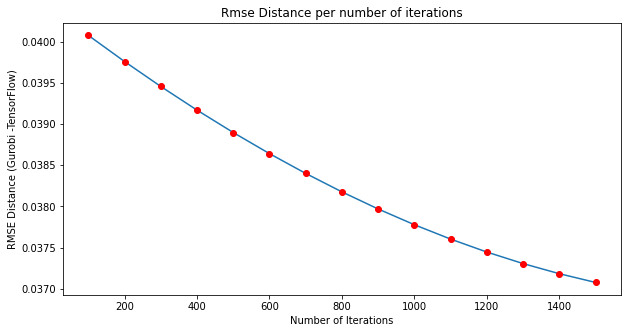

N_ITER        RMSE_DISTANCE
100           0.04007863137213265
200           0.03976069147924658
300           0.03945771663459973
400           0.03917005239065512
500           0.03889788839479386
600           0.03864136046956783
700           0.03840077551884181
800           0.03817640348909282
900           0.0379683999054449
1000          0.03777701958726758
1100          0.03760251399983383
1200          0.03744511780777695
1300          0.03730498335203901
1400          0.03718191918525369
1500          0.037075765601519504


In [17]:
path = "../../../log/Prove-4/Setosa/c75_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


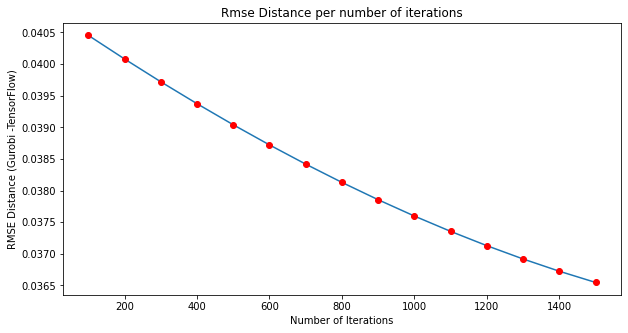

N_ITER        RMSE_DISTANCE
100           0.04045464669690292
200           0.040081166642479994
300           0.03972087515206507
400           0.03937412682437667
500           0.03904127708376138
600           0.03872267860773713
700           0.03841867869269272
800           0.038129619490579664
900           0.037855833436609386
1000          0.03759764345063351
1100          0.037355359254895734
1200          0.03712910015719149
1300          0.036918958403106605
1400          0.03672518428229362
1500          0.03654800458454028


In [18]:
path = "../../../log/Prove-4/Setosa/c75_sigma025_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

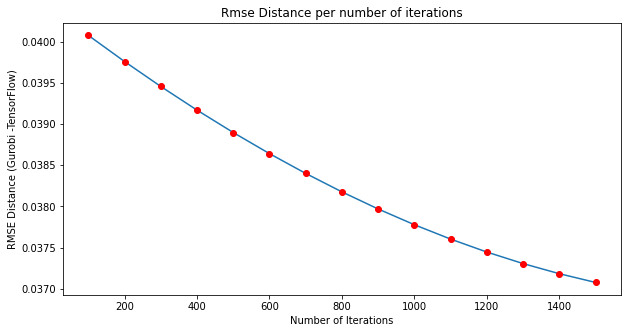

N_ITER        RMSE_DISTANCE
100           0.04007863137213265
200           0.03976069147924658
300           0.03945771663459973
400           0.03917005239065512
500           0.03889788839479386
600           0.03864136046956783
700           0.03840077551884181
800           0.03817640348909282
900           0.0379683999054449
1000          0.03777701958726758
1100          0.03760251399983383
1200          0.03744511780777695
1300          0.03730498335203901
1400          0.03718191918525369
1500          0.037075765601519504


In [19]:
path = "../../../log/Prove-4/Setosa/c75_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

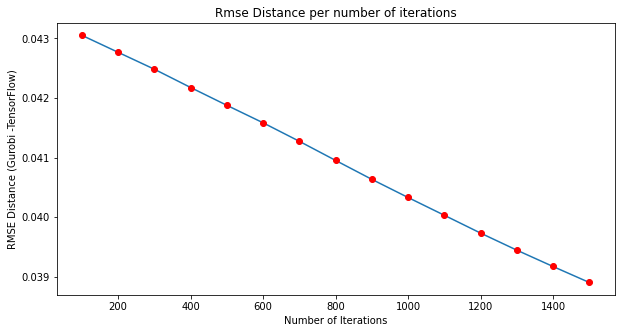

N_ITER        RMSE_DISTANCE
100           0.04305143461888141
200           0.042766594115636436
300           0.04248265872932077
400           0.04217626476215373
500           0.041877384742090046
600           0.04158386528404834
700           0.04127358829563801
800           0.04095311565278826
900           0.04063533183433241
1000          0.04033085909051726
1100          0.04003283357297233
1200          0.03973381754937273
1300          0.039447536274183306
1400          0.0391733175852025
1500          0.03890517907480896


In [20]:
path = "../../../log/Prove-4/Setosa/c75_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


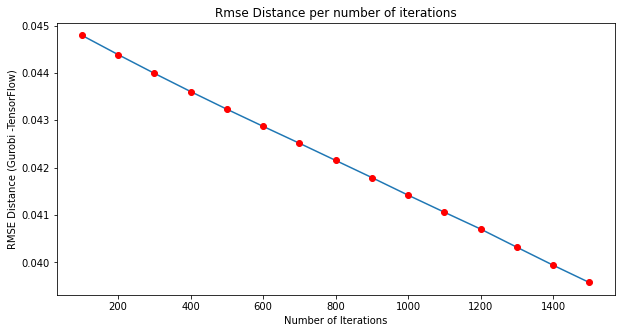

N_ITER        RMSE_DISTANCE
100           0.04479379918941483
200           0.044386620295192684
300           0.04399087504952064
400           0.0436066122177317
500           0.04323383802849526
600           0.04287210167830518
700           0.04251556206391668
800           0.04215282444764315
900           0.04179045302943867
1000          0.04141923554736181
1100          0.041059046421628054
1200          0.040703683038069254
1300          0.040320028950583266
1400          0.039940504766949075
1500          0.03957477475959848


In [21]:
path = "../../../log/Prove-4/Setosa/c75_sigma05_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

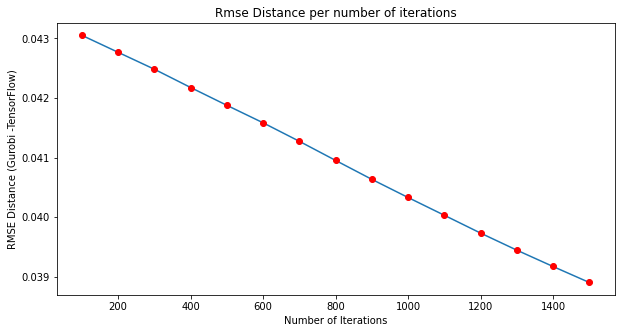

N_ITER        RMSE_DISTANCE
100           0.04305143461888141
200           0.042766594115636436
300           0.04248265872932077
400           0.04217626476215373
500           0.041877384742090046
600           0.04158386528404834
700           0.04127358829563801
800           0.04095311565278826
900           0.04063533183433241
1000          0.04033085909051726
1100          0.04003283357297233
1200          0.03973381754937273
1300          0.039447536274183306
1400          0.0391733175852025
1500          0.03890517907480896


In [22]:
path = "../../../log/Prove-4/Setosa/c75_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

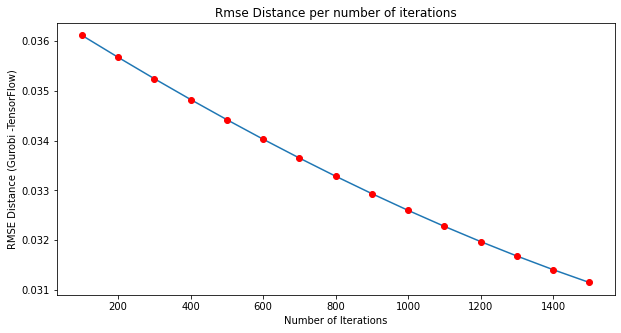

N_ITER        RMSE_DISTANCE
100           0.03611231908829592
200           0.035670746640667904
300           0.035241039728196685
400           0.034823595056062556
500           0.034418718967729654
600           0.03402684898139505
700           0.033648439220800616
800           0.033283944681673394
900           0.03293364721860247
1000          0.032597794047439024
1100          0.03227682389637186
1200          0.031971184772046156
1300          0.031681215536585136
1400          0.0314072063513957
1500          0.03114942018624977


In [23]:
path = "../../../log/Prove-4/Setosa/c200_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


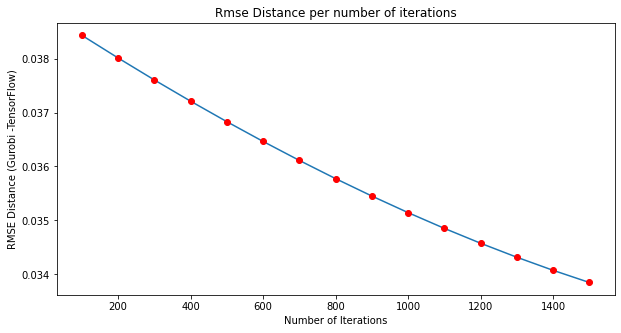

N_ITER        RMSE_DISTANCE
100           0.038431631724347354
200           0.03801134287205629
300           0.037604235273715515
400           0.037210588379937425
500           0.03683055151279459
600           0.03646444970639161
700           0.03611249064520668
800           0.035774951624537976
900           0.035452242888012235
1000          0.03514477374436461
1100          0.034852946996246414
1200          0.03457715892000164
1300          0.03431779612016318
1400          0.03407517256308164
1500          0.03384951630310618


In [24]:
path = "../../../log/Prove-4/Setosa/c200_sigma01_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

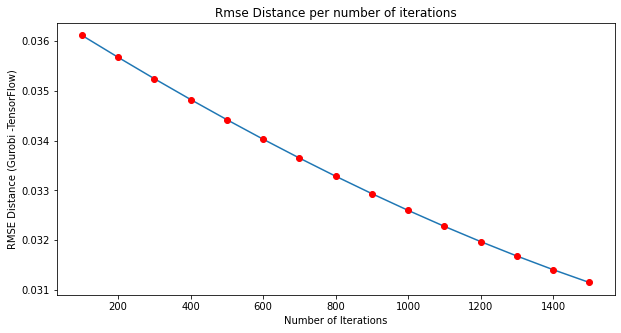

N_ITER        RMSE_DISTANCE
100           0.03611231908829592
200           0.035670746640667904
300           0.035241039728196685
400           0.034823595056062556
500           0.034418718967729654
600           0.03402684898139505
700           0.033648439220800616
800           0.033283944681673394
900           0.03293364721860247
1000          0.032597794047439024
1100          0.03227682389637186
1200          0.031971184772046156
1300          0.031681215536585136
1400          0.0314072063513957
1500          0.03114942018624977


In [25]:
path = "../../../log/Prove-4/Setosa/c200_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

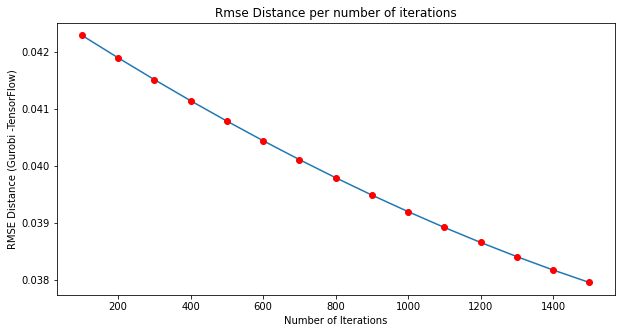

N_ITER        RMSE_DISTANCE
100           0.042295113540484874
200           0.041900225633937756
300           0.04151744118478828
400           0.04114709636012572
500           0.040789527774989925
600           0.040444979559724245
700           0.04011363523692196
800           0.03979558772263821
900           0.039490965988221806
1000          0.03919991809206669
1100          0.03892260052772252
1200          0.038659281021514655
1300          0.038410247018648216
1400          0.03817577680988752
1500          0.03795613720959576


In [26]:
path = "../../../log/Prove-4/Setosa/c200_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


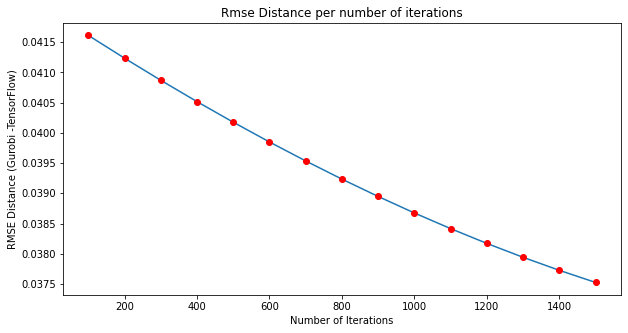

N_ITER        RMSE_DISTANCE
100           0.04161088386055995
200           0.041233288138163765
300           0.04086808230525003
400           0.040515428504728015
500           0.04017544273372334
600           0.03984836207807694
700           0.03953449977258615
800           0.039234061406882
900           0.038947286894355546
1000          0.0386744589230585
1100          0.0384157382771961
1200          0.0381713690921132
1300          0.0379415588386321
1400          0.03772644128404262
1500          0.03752607638557448


In [27]:
path = "../../../log/Prove-4/Setosa/c200_sigma025_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

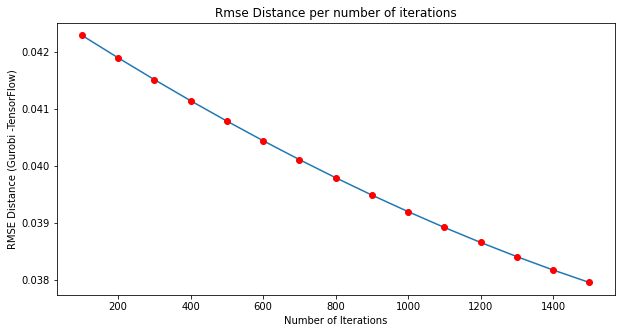

N_ITER        RMSE_DISTANCE
100           0.042295113540484874
200           0.041900225633937756
300           0.04151744118478828
400           0.04114709636012572
500           0.040789527774989925
600           0.040444979559724245
700           0.04011363523692196
800           0.03979558772263821
900           0.039490965988221806
1000          0.03919991809206669
1100          0.03892260052772252
1200          0.038659281021514655
1300          0.038410247018648216
1400          0.03817577680988752
1500          0.03795613720959576


In [28]:
path = "../../../log/Prove-4/Setosa/c200_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

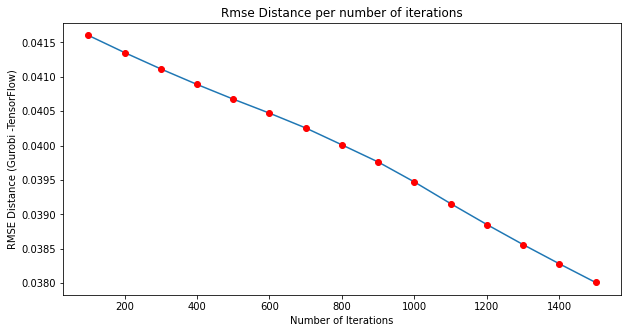

N_ITER        RMSE_DISTANCE
100           0.041603403248816694
200           0.041353179259981054
300           0.04111529160633657
400           0.04088966036919194
500           0.04067577109941797
600           0.040471750573800626
700           0.0402561863001162
800           0.040010661259667166
900           0.03976143612993706
1000          0.03947072325776665
1100          0.03915607600142439
1200          0.03885167759553715
1300          0.038560229918354796
1400          0.03828085571676042
1500          0.038009496622873236


In [29]:
path = "../../../log/Prove-4/Setosa/c200_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


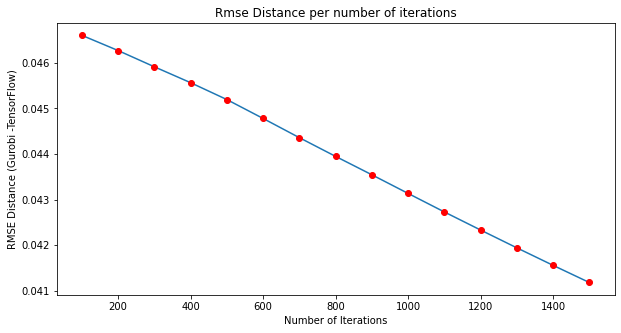

N_ITER        RMSE_DISTANCE
100           0.04660116537405212
200           0.04626753452759835
300           0.04591157279291849
400           0.045563042383737005
500           0.045193299686394454
600           0.04477931567412833
700           0.04435848864868303
800           0.043948063976876534
900           0.04354539053727025
1000          0.04313656355632203
1100          0.04273054062175018
1200          0.04233422635387848
1300          0.041943932571815466
1400          0.041560415895001694
1500          0.04118424157027406


In [30]:
path = "../../../log/Prove-4/Setosa/c200_sigma05_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

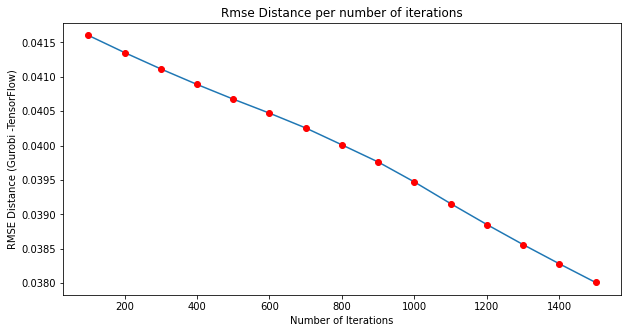

N_ITER        RMSE_DISTANCE
100           0.041603403248816694
200           0.041353179259981054
300           0.04111529160633657
400           0.04088966036919194
500           0.04067577109941797
600           0.040471750573800626
700           0.0402561863001162
800           0.040010661259667166
900           0.03976143612993706
1000          0.03947072325776665
1100          0.03915607600142439
1200          0.03885167759553715
1300          0.038560229918354796
1400          0.03828085571676042
1500          0.038009496622873236


In [31]:
path = "../../../log/Prove-4/Setosa/c200_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)